In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
from tqdm import tqdm
from PIL import Image

In [3]:
train_messy = "../input/images/train/messy"
train_clean = "../input/images/train/clean"
test_messy = "../input/images/val/messy"
test_clean = "../input/images/val/clean"
image_size = 128

100%|██████████| 96/96 [00:01<00:00, 59.84it/s]


Text(0.5, 1.0, 'Messy and Clean Rooms in GrayScale')

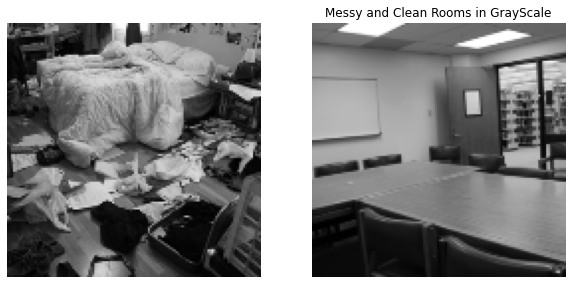

In [4]:
for image in tqdm(os.listdir(train_messy)):
    path = os.path.join(train_messy, image)
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (image_size, image_size)).flatten()
    np_img = np.asarray(img)
    
for image2 in tqdm(os.listdir(train_clean)):
    path = os.path.join(train_clean, image2)
    img2 = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    img2 = cv2.resize(img2, (image_size, image_size)).flatten()
    np_img2 = np.asarray(img2)
    
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(np_img.reshape(image_size, image_size), cmap="gray")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(np_img2.reshape(image_size, image_size), cmap="gray")
plt.axis("off")
plt.title("Messy and Clean Rooms in GrayScale")

In [5]:
def train_data():
    train_data_messy = []
    train_data_clean = []
    for image1 in tqdm(os.listdir(train_messy)):
        path = os.path.join(train_messy, image1)
        img1 = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        img1 = cv2.resize(img1, (image_size, image_size))
        train_data_messy.append(img1)
    for image2 in tqdm(os.listdir(train_clean)):
        path = os.path.join(train_clean, image2)
        img2 = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        img2 = cv2.resize(img2, (image_size, image_size))
        train_data_clean.append(img2)
        
    train_data = np.concatenate((np.asarray(train_data_messy), np.asarray(train_data_clean)), axis=0)
    return train_data

In [6]:
def test_data():
    test_data_messy = []
    test_data_clean = []
    for image1 in tqdm(os.listdir(test_messy)):
        path = os.path.join(test_messy, image1)
        img1 = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        img1 = cv2.resize(img1, (image_size, image_size))
        test_data_messy.append(img1)
    for image2 in tqdm(os.listdir(test_clean)):
        path = os.path.join(test_clean, image2)
        img2 = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        img2 = cv2.resize(img2, (image_size, image_size))
        test_data_clean.append(img2)
    
    test_data = np.concatenate((np.asarray(test_data_messy), np.asarray(test_data_clean)), axis=0)
    return test_data

In [7]:
train_data = train_data()
test_data = test_data()

100%|██████████| 10/10 [00:00<00:00, 52.77it/s]


In [8]:
x_data = np.concatenate((train_data, test_data), axis=0)
x_data = (x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))

In [9]:
z1 = np.zeros(96)
o1 = np.ones(96)
Y_train = np.concatenate((o1, z1), axis=0)
z = np.zeros(10)
o = np.ones(10)
Y_test = np.concatenate((o, z), axis=0)

# messy = 1
# clean = 0

In [10]:
y_data = np.concatenate((Y_train, Y_test), axis=0).reshape(x_data.shape[0],1)

In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.33, random_state=42)
number_of_train = x_train.shape[0]
number_of_test = x_test.shape[0]

In [32]:
x_train = x_train.reshape(number_of_train, x_train.shape[1]*x_train.shape[2])
x_test = x_test.reshape(number_of_test, x_test.shape[1]*x_test.shape[2])
y_train = y_train.reshape(number_of_train, )
y_test = y_test.reshape(number_of_test, )

In [33]:
from sklearn.linear_model import LogisticRegression

In [41]:
model = LogisticRegression(max_iter=1500)

In [42]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((142, 16384), (142,), (70, 16384), (70,))

In [43]:
model.fit(x_train, y_train)

LogisticRegression(max_iter=1500)

In [44]:
model.score(x_test, y_test)

0.6428571428571429

In [38]:
ans = model.predict(x_test[:10])
ans

array([1., 1., 0., 0., 0., 0., 0., 0., 0., 0.])

In [39]:
ans = list(map(lambda x: "Messy" if x else "Clean", ans))

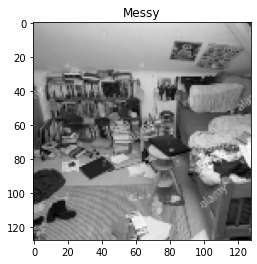

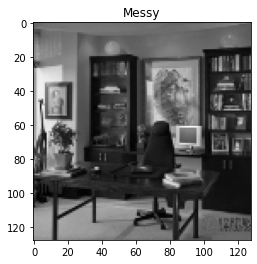

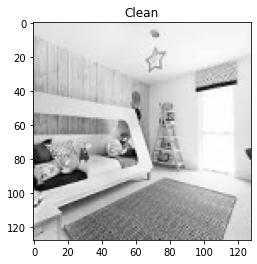

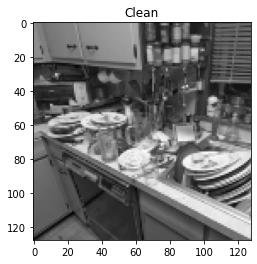

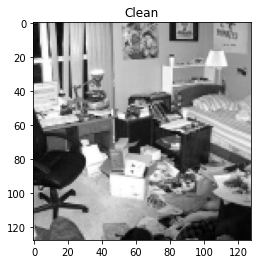

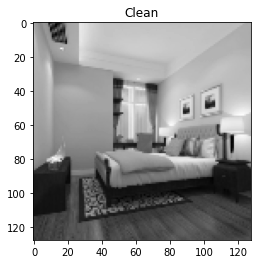

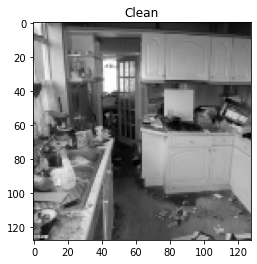

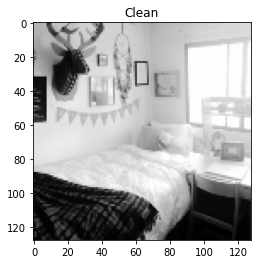

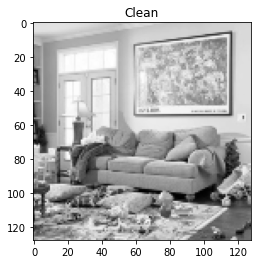

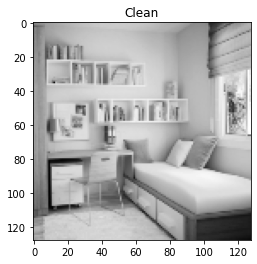

In [40]:
for i in range(len(ans)):
    plt.imshow(x_test[i].reshape(128, 128), cmap="gray")
    plt.title(ans[i])
    plt.show()